# Finance Data Project 
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [41]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime
%matplotlib inline

## Data

Get data using pandas datareader, and will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. **
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

In [3]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,12,31)

In [12]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [14]:
tickers=["BAC", "C", "GS", "JPM", "MS", "WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. **

In [19]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

** Set the column name levels **

In [20]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [21]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.399338  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.424999  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.527611  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.566090  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.963749  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.904305  
2006-01-04   31.799999  31.530001  10870000.0  20.661839  
2006-01-05   31.500000  31.495001  10158000.0  20.638908  
2006-01-06   31.580000  31.680000   8403800.0  20.760138  
2006-01-09   31.674999  31.674999   5619600.0  20.756863  

[5 rows x 36 columns]

# EDA

In [30]:
for tick in tickers:
    print(tick, bank_stocks[tick]["Close"].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 87.12999725341797
MS 89.30000305175781
WFC 58.52000045776367


In [34]:
bank_stocks.xs(key="Close",axis=1,level="Stock Info").max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     87.129997
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [35]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [40]:
for tick in tickers:
    returns[tick+" Return"]=bank_stocks[tick]["Close"].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


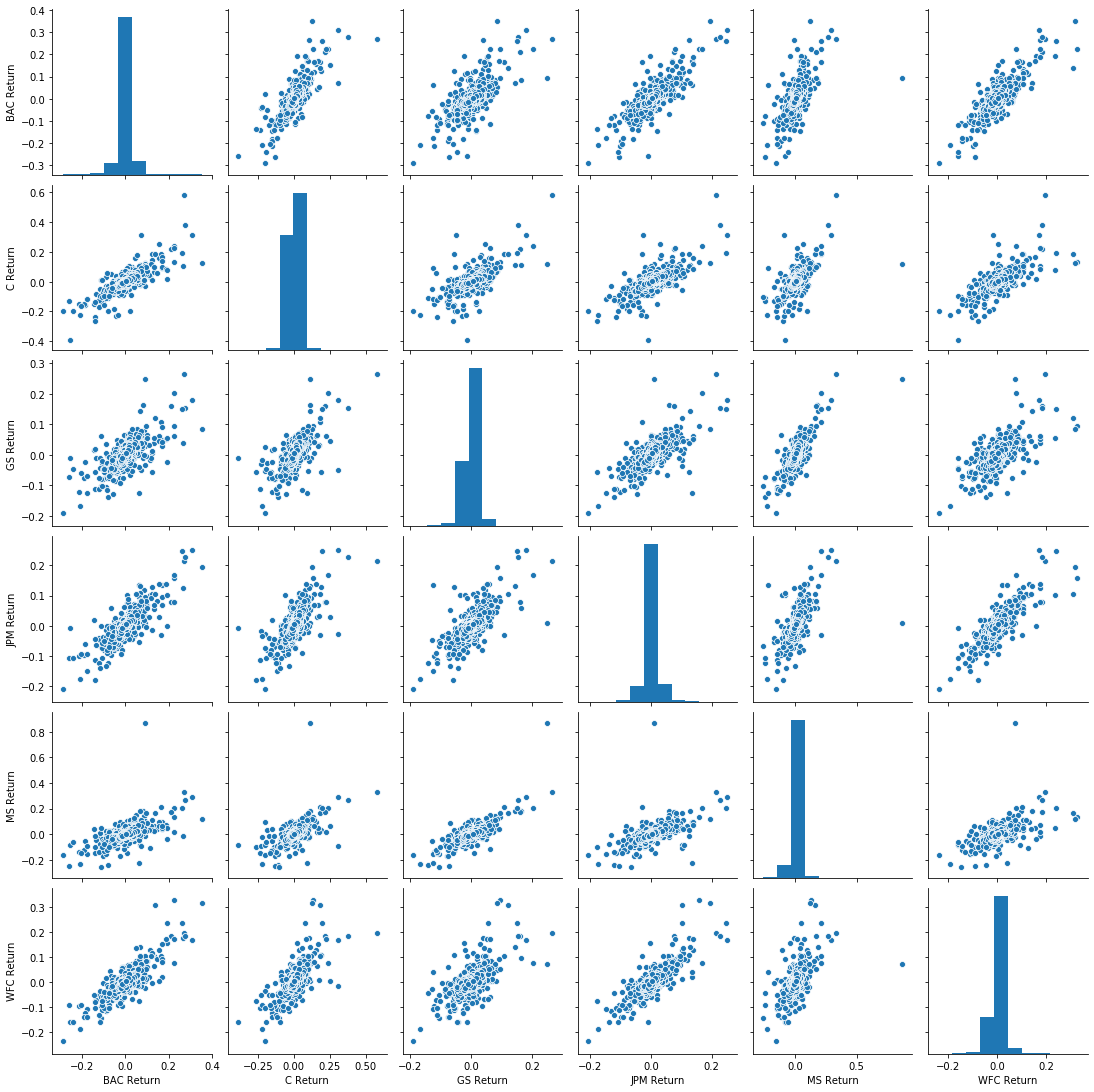

In [43]:
sns.pairplot(returns[1:])

** Create a pairplot using seaborn of the returns dataframe. **

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Noticed that 4 of the banks share the same day for the worst drop **

In [46]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** Noticed that Citigroup's largest drop and biggest gain were very close to one another **

In [49]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, Citi was classified as the riskiest over the entire time period **

In [52]:
returns.std()

BAC Return    0.035467
C Return      0.037360
GS Return     0.024736
JPM Return    0.026794
MS Return     0.036583
WFC Return    0.029184
dtype: float64

In [81]:
returns.

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [58]:
returns.loc["2015-01-01":"2015-12-31"].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

(-0.08, 0.08)

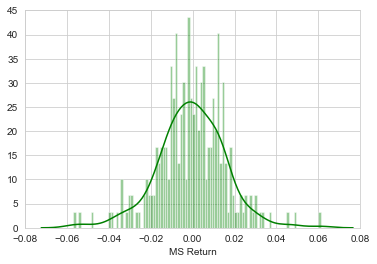

In [86]:
MSP=sns.distplot(returns.loc["2015-01-01":"2015-12-31"]["MS Return"],kde=True,bins=100,color="green")
MSP.set_ylim(0,45)
MSP.set_xlim(-0.08,0.08)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

(-0.4, 0.8)

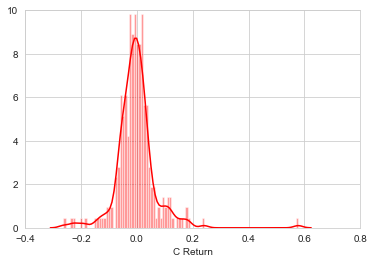

In [85]:
CP=sns.distplot(returns.loc["2008-01-01":"2008-12-31"]["C Return"],kde=True,bins=100,color="red")
CP.set_ylim(0,10)
CP.set_xlim(-0.4,0.8)

____
# More Visualization



In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import chart_studio.plotly as py
from plotly import __version__
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. **

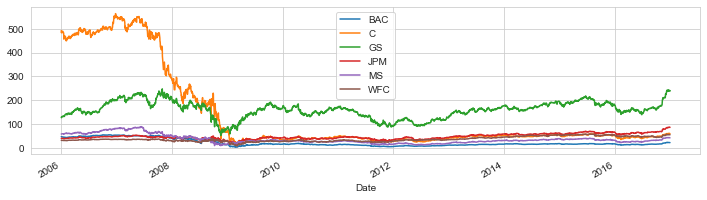

In [88]:
for tick in tickers:
    bank_stocks[tick]["Close"].plot(label=tick,figsize=(12,3))
plt.legend()

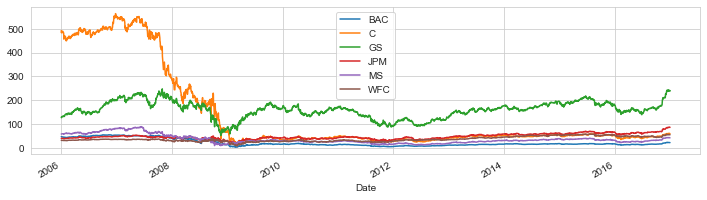

In [89]:
bank_stocks.xs(key="Close",axis=1,level="Stock Info").plot(label=tick,figsize=(12,3))
plt.legend()

In [96]:
# bank_stocks.xs(key="Close",axis=1,level="Stock Info").iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

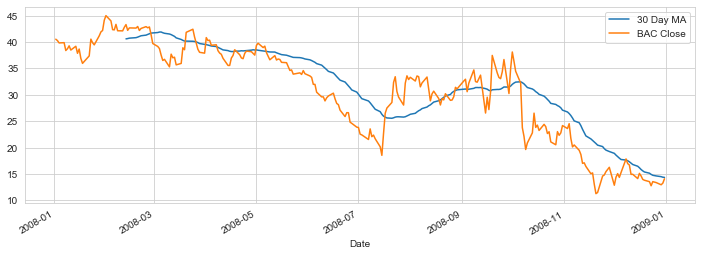

In [103]:
plt.figure(figsize=(12,4))
BAC["Close"].loc["2008-01-01":"2009-01-01"].rolling(window=30).mean().plot(label="30 Day MA")
BAC["Close"].loc["2008-01-01":"2009-01-01"].plot(label="BAC Close")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

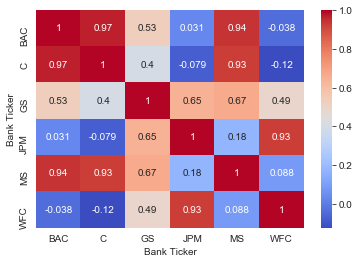

In [109]:
sns.heatmap(data=bank_stocks.xs(key="Close",axis=1,level="Stock Info").corr(),annot=True,cmap="coolwarm")

** Use seaborn's clustermap to cluster the correlations together:**

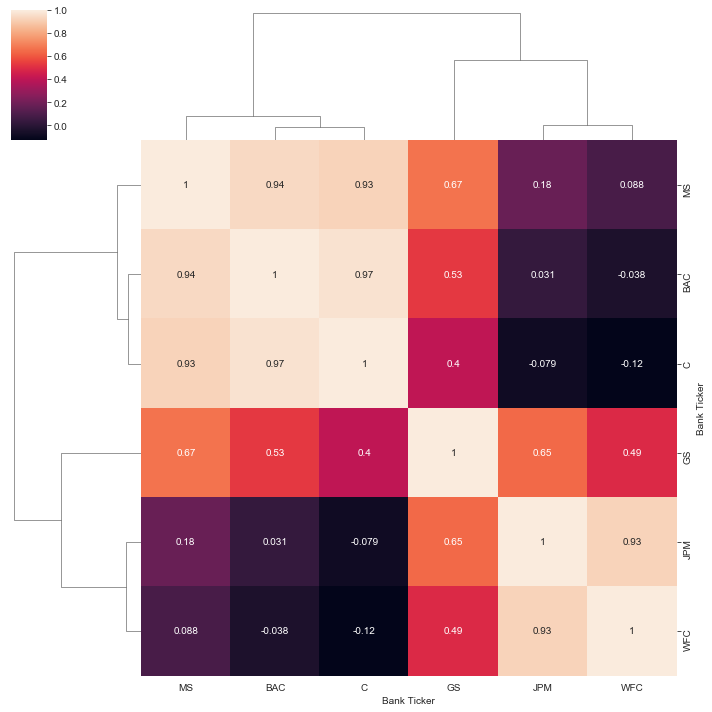

In [118]:
sns.clustermap(data=bank_stocks.xs(key="Close",axis=1,level="Stock Info").corr(),annot=True)

# Part 2

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [124]:
bank_stocks.loc["2015-01-01":"2016-01-01"]["BAC"][["Open","Close","Low","High"]].iplot(kind="candle")

In [120]:
bank_stocks.loc["2015-01-01":"2016-01-01"]["BAC"].iplot(kind="candle")

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [126]:
bank_stocks.loc["2015-01-01":"2016-01-01"]["MS"]["Close"].ta_plot(study="sma",period=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [127]:
bank_stocks.loc["2015-01-01":"2016-01-01"]["BAC"]["Close"].ta_plot(study="boll")